In [151]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    # LinearRegression,
    LogisticRegression,
    Trainer,
    clusters
)

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [152]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [153]:
X, y = clusters(SIZE, std0 = 1.3, std1 = 1.6)

In [154]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-1.4418, -1.0786],
        [-3.5434, -3.3295],
        [-2.7824, -1.0189],
        [-3.7175, -4.4455],
        [-3.6336, -2.9639],
        [-4.4223, -4.4165],
        [-3.5654, -5.2226],
        [-1.1846, -1.6773],
        [-2.0136, -1.8149],
        [-5.9102, -3.9522],
        [-1.4724, -4.6705],
        [-2.7591, -1.5116],
        [-2.3255, -4.1890],
        [-2.8646, -0.7676],
        [-3.1899, -1.4500],
        [-1.0976, -3.3577],
        [-2.1718, -4.1556],
        [-3.9209, -7.2541],
        [-2.5572, -0.8437],
        [-5.2838, -2.1317],
        [-4.1272, -2.9091],
        [-2.4296, -3.7579],
        [-2.4051, -2.3531],
        [-2.9271, -3.4974],
        [-2.0365, -4.4424],
        [-6.2897, -6.5173],
        [-2.9999, -2.2464],
        [-2.4548, -2.9391],
        [-3.8081, -3.8995],
        [-3.1958,  0.5193],
        [-4.4431, -2.9447],
        [-3.0220, -3.5853],
        [-2.2699, -3.6197],
        [-3.0112, -4.0488],
        [-3.6685, -2.9650],
       

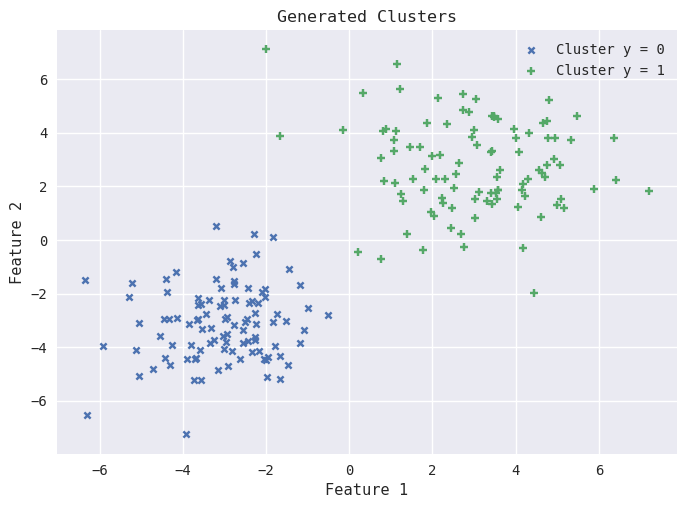

In [155]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [156]:
Model = LogisticRegression(in_dims=2).to(DEVICE)

In [157]:
Data = TensorDataset(X, y)
Data.tensors

(tensor([[-1.4418, -1.0786],
         [-3.5434, -3.3295],
         [-2.7824, -1.0189],
         [-3.7175, -4.4455],
         [-3.6336, -2.9639],
         [-4.4223, -4.4165],
         [-3.5654, -5.2226],
         [-1.1846, -1.6773],
         [-2.0136, -1.8149],
         [-5.9102, -3.9522],
         [-1.4724, -4.6705],
         [-2.7591, -1.5116],
         [-2.3255, -4.1890],
         [-2.8646, -0.7676],
         [-3.1899, -1.4500],
         [-1.0976, -3.3577],
         [-2.1718, -4.1556],
         [-3.9209, -7.2541],
         [-2.5572, -0.8437],
         [-5.2838, -2.1317],
         [-4.1272, -2.9091],
         [-2.4296, -3.7579],
         [-2.4051, -2.3531],
         [-2.9271, -3.4974],
         [-2.0365, -4.4424],
         [-6.2897, -6.5173],
         [-2.9999, -2.2464],
         [-2.4548, -2.9391],
         [-3.8081, -3.8995],
         [-3.1958,  0.5193],
         [-4.4431, -2.9447],
         [-3.0220, -3.5853],
         [-2.2699, -3.6197],
         [-3.0112, -4.0488],
         [-3.6

In [158]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [159]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.BCELoss(reduction='mean'),        # Binary Cross-entropy Loss (For classification)
    device=DEVICE
)

In [160]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

	Epoch 1 | Weights: tensor([ 0.3301, -0.6223], device='cuda:0')
	Epoch 1 | Bias: tensor([0.7060], device='cuda:0')
	Epoch 1 | Weights: tensor([ 0.5466, -0.4006], device='cuda:0')
	Epoch 1 | Bias: tensor([0.6819], device='cuda:0')
	Epoch 1 | Weights: tensor([ 0.6269, -0.2504], device='cuda:0')
	Epoch 1 | Bias: tensor([0.6804], device='cuda:0')
	Epoch 1 | Weights: tensor([ 0.7033, -0.1622], device='cuda:0')
	Epoch 1 | Bias: tensor([0.6646], device='cuda:0')
	Epoch 1 | Weights: tensor([ 0.7587, -0.0926], device='cuda:0')
	Epoch 1 | Bias: tensor([0.6487], device='cuda:0')
Epoch 1/20 | Loss: 1.0550
	| Validation Loss: 0.2275

	Epoch 2 | Weights: tensor([ 0.7871, -0.0189], device='cuda:0')
	Epoch 2 | Bias: tensor([0.6489], device='cuda:0')
	Epoch 2 | Weights: tensor([0.8152, 0.0445], device='cuda:0')
	Epoch 2 | Bias: tensor([0.6422], device='cuda:0')
	Epoch 2 | Weights: tensor([0.8405, 0.0717], device='cuda:0')
	Epoch 2 | Bias: tensor([0.6371], device='cuda:0')
	Epoch 2 | Weights: tensor([0.

In [161]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{0: 1.0549501359462738, 1: 0.15407652258872986, 2: 0.08626304119825363, 3: 0.0627395711839199, 4: 0.05041956678032875, 5: 0.04281642436981201, 6: 0.03756069429218769, 7: 0.033758428692817685, 8: 0.030867769196629525, 9: 0.02856554128229618, 10: 0.026694861054420472, 11: 0.025153499841690064, 12: 0.023828447237610816, 13: 0.022682172991335393, 14: 0.021714687533676624, 15: 0.020847316645085812, 16: 0.020079801976680755, 17: 0.01940242312848568, 18: 0.01879868246614933, 19: 0.018238902650773527}

Validation Loss:
{0: 0.22748947888612747, 1: 0.08692339807748795, 2: 0.06863669492304325, 3: 0.03998118359595537, 4: 0.041743967682123184, 5: 0.02835724875330925, 6: 0.0380814578384161, 7: 0.023765495978295803, 8: 0.03000545222312212, 9: 0.015807610005140305, 10: 0.01740890648216009, 11: 0.017007935792207718, 12: 0.015896176919341087, 13: 0.021419809199869633, 14: 0.016820354387164116, 15: 0.01168859051540494, 16: 0.017523512709885836, 17: 0.015120743308216333, 18: 0.0147431809455156

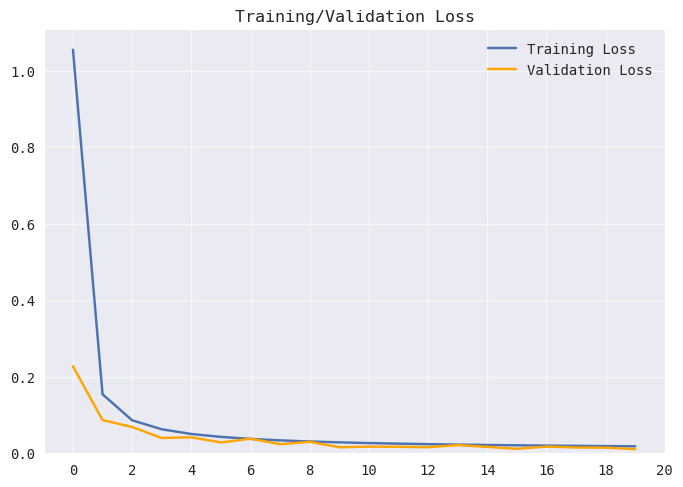

In [162]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.ylim(bottom=-0);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [163]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.w), "Bias: {}".format(Model.b), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([1.2639, 0.7003], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([0.5966], device='cuda:0', requires_grad=True)


In [164]:
T = torch.linspace(X.min(), X.max(), SIZE, dtype=DTYPE, device=DEVICE).reshape(SIZE, 1)
T = torch.cat([T, T], dim=1)

slope = -Model.w[0] / Model.w[1]
interc = -Model.b / Model.w[1]
boundary = slope * T + interc

print("Tensor T to plot the boundary:", T, sep='\n')

Tensor T to plot the boundary:
tensor([[-7.2541, -7.2541],
        [-7.1081, -7.1081],
        [-6.9621, -6.9621],
        [-6.8161, -6.8161],
        [-6.6701, -6.6701],
        [-6.5241, -6.5241],
        [-6.3781, -6.3781],
        [-6.2322, -6.2322],
        [-6.0862, -6.0862],
        [-5.9402, -5.9402],
        [-5.7942, -5.7942],
        [-5.6482, -5.6482],
        [-5.5022, -5.5022],
        [-5.3562, -5.3562],
        [-5.2102, -5.2102],
        [-5.0642, -5.0642],
        [-4.9183, -4.9183],
        [-4.7723, -4.7723],
        [-4.6263, -4.6263],
        [-4.4803, -4.4803],
        [-4.3343, -4.3343],
        [-4.1883, -4.1883],
        [-4.0423, -4.0423],
        [-3.8963, -3.8963],
        [-3.7503, -3.7503],
        [-3.6044, -3.6044],
        [-3.4584, -3.4584],
        [-3.3124, -3.3124],
        [-3.1664, -3.1664],
        [-3.0204, -3.0204],
        [-2.8744, -2.8744],
        [-2.7284, -2.7284],
        [-2.5824, -2.5824],
        [-2.4364, -2.4364],
        [-2.2905,

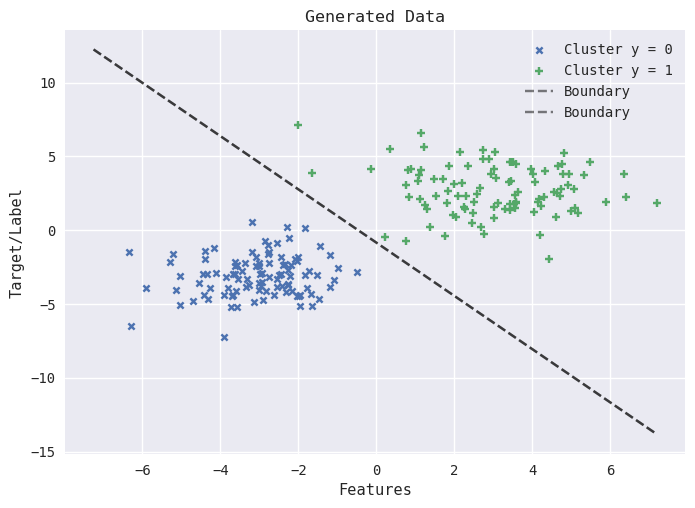

In [165]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
# Decision Boundary
plt.plot(
    T[:, 1].detach().cpu(),
    boundary.detach().cpu(),
    alpha=.5,
    color='black',
    linestyle='--',
    label="Boundary"
);

plt.xlabel("Features");
plt.ylabel("Target/Label");
plt.title("Generated Data");
plt.legend(loc='best');
plt.show();